In [60]:
import os
import sys; sys.path.append("~/HHbbgg_ETH_devel/bregression/python") # to load packages
import training_utils as utils
import numpy as np
reload(utils)
import preprocessing_utils as preprocessing
reload(preprocessing)
import plotting_utils as plotting
reload(plotting)
import optimization_utils as optimization
reload(optimization)
import postprocessing_utils as postprocessing
reload(postprocessing)


<module 'postprocessing_utils' from '/mnt/t3nfs01/data01/shome/nchernya/HHbbgg_ETH_devel/bregression/python/postprocessing_utils.pyc'>

In [61]:
ntuples = 'heppy_05_10_2017'
# "%" sign allows to interpret the rest as a system command
%env data=$utils.IO.ldata$ntuples
files = ! ls $data | sort -t_ -k 3 -n

ttbar= [s for s in files if "ttbar" in s]

utils.IO.add_data(ntuples,ttbar,1)

for i in range(len(utils.IO.dataName)):        
    print "using data file n."+str(i)+": "+utils.IO.dataName[i]


env: data=/mnt/t3nfs01/data01/shome/nchernya/HHbbgg_ETH_devel/root_files/heppy_05_10_2017
using data file n.0: /mnt/t3nfs01/data01/shome/nchernya/HHbbgg_ETH_devel/root_files/heppy_05_10_2017/ttbar_RegressionPerJet.root


['Jet_mcPt', 'Jet_pt', 'Jet_corr', 'rho', 'Jet_eta', 'Jet_mt', 'Jet_leadTrackPt', 'Jet_leptonPtRel', 'Jet_leptonPt', 'Jet_leptonDeltaR', 'Jet_neHEF', 'Jet_chMult', 'Jet_vtxPt', 'Jet_vtxMass', 'Jet_vtx3dL', 'Jet_vtxNtrk', 'Jet_vtx3deL']


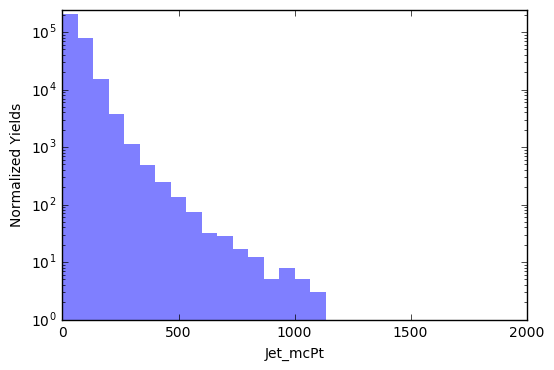

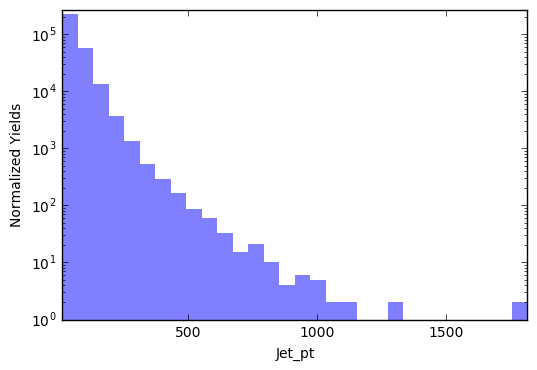

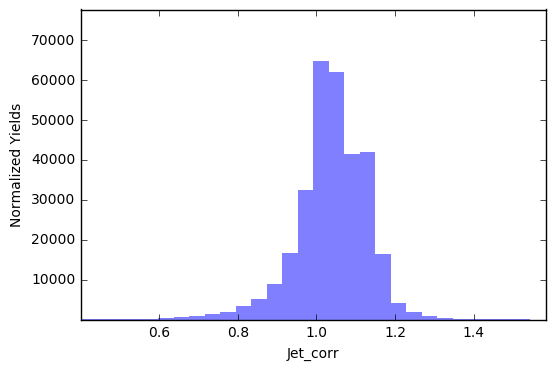

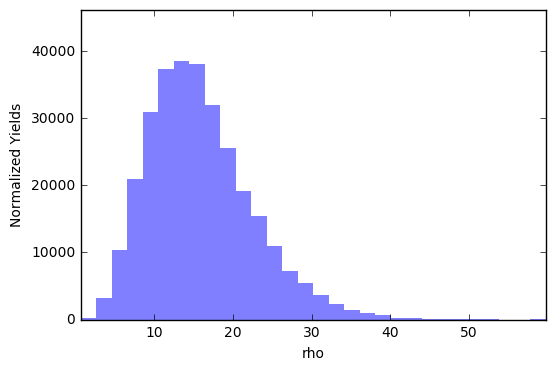

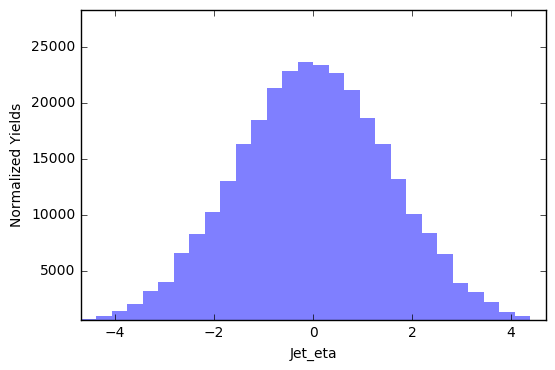

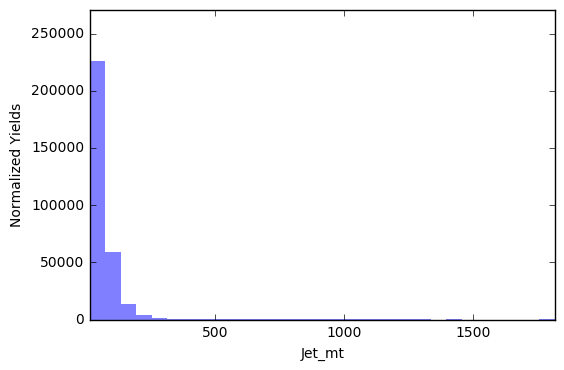

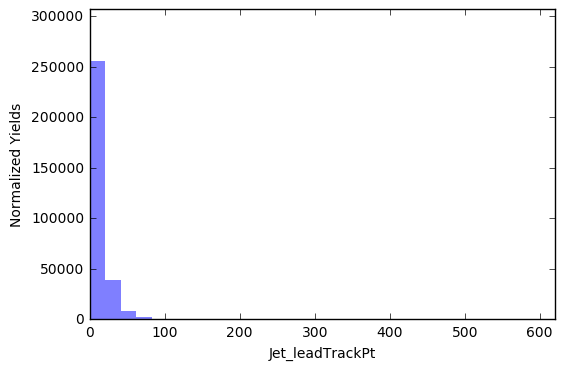

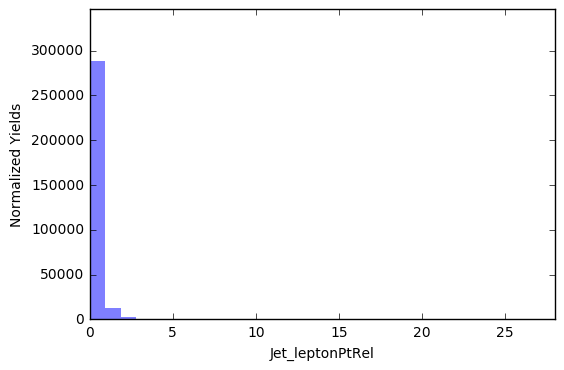

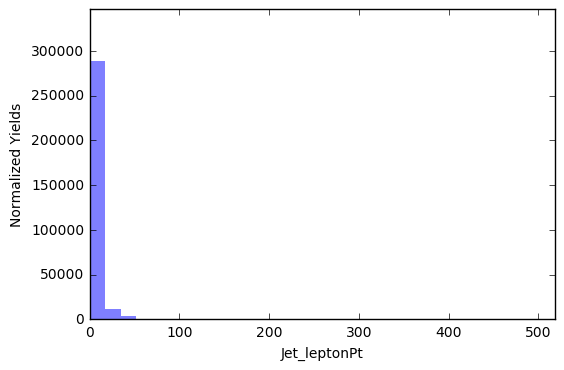

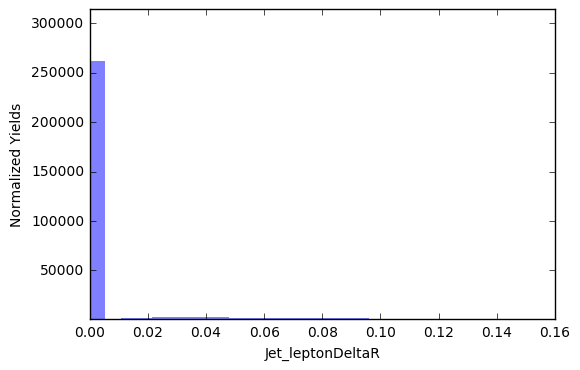

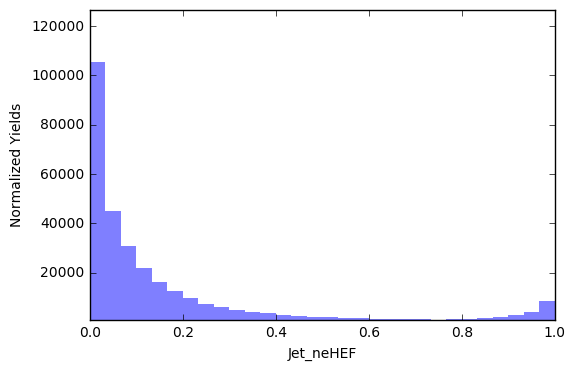

/swshare/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


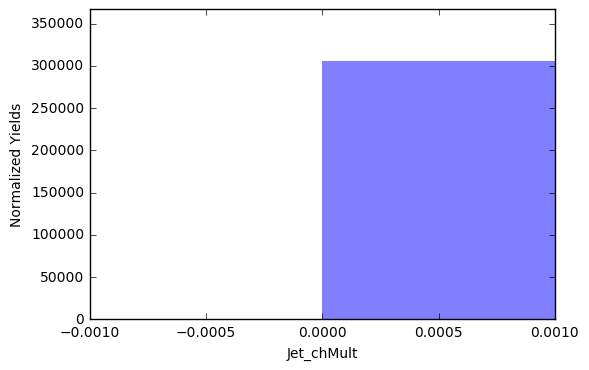

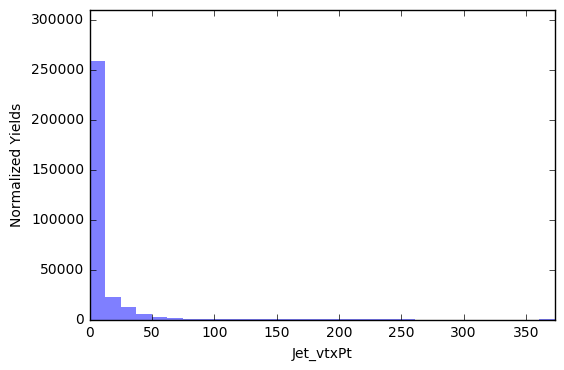

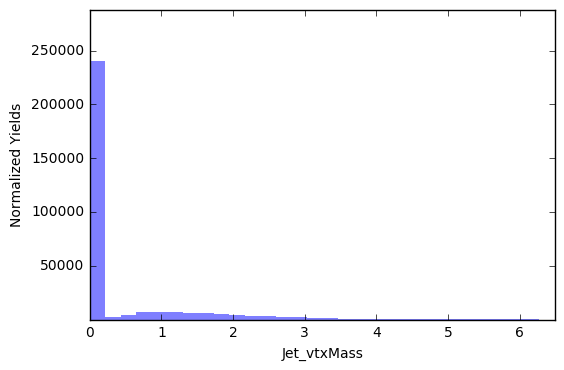

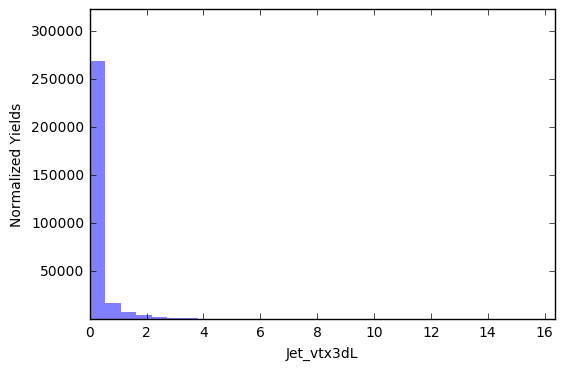

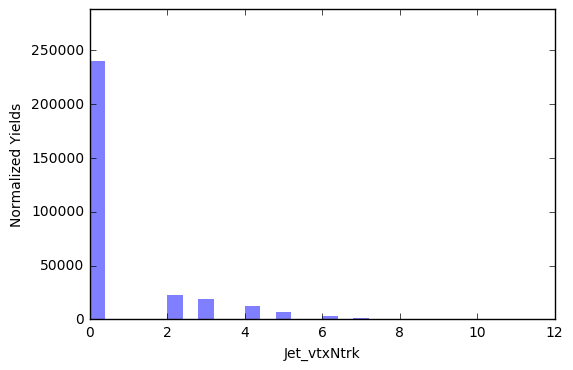

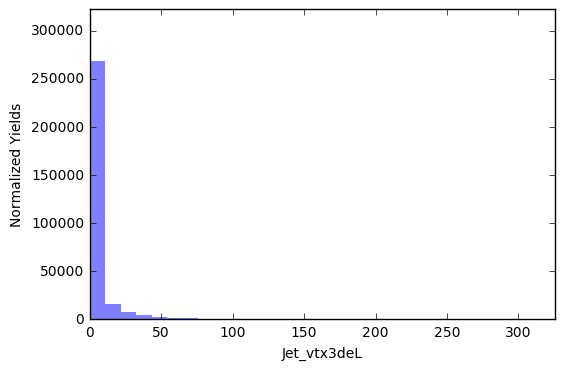

In [62]:
#use noexpand for root expressions, it needs this file https://github.com/ibab/root_pandas/blob/master/root_pandas/readwrite.py
#noexpand:fabs(CosThetaStar_CS)
branch_names = 'Jet_mcPt,Jet_pt,Jet_corr,rho,Jet_eta,Jet_mt,Jet_leadTrackPt,Jet_leptonPtRel,Jet_leptonPt,Jet_leptonDeltaR,Jet_neHEF,Jet_chMult,Jet_vtxPt,Jet_vtxMass,Jet_vtx3dL,Jet_vtxNtrk,Jet_vtx3deL'.split(",")


branch_names = [c.strip() for c in branch_names]
#branch_names = (b.replace(" ", "_") for b in branch_names)
#branch_names = list(b.replace("-", "_") for b in branch_names)
print branch_names

import pandas as pd
import root_pandas as rpd

#preprocessing.set_signals_and_backgrounds("tree",branch_names)
X_data, y_data = preprocessing.set_data_simple("tree",branch_names)
#print np.round(X_data,2)
X_data,y_data=preprocessing.randomize_simple(X_data,y_data)
#print X_data
jet_mcPt = utils.IO.data_df[0][['Jet_mcPt']]
#print jet_mcPt
new_jet_mcPt = jet_mcPt.query('Jet_mcPt > 30')
#print new_jet_mcPt
#print type(jet_mcPt)

from sklearn.externals import joblib
import xgboost as xgb
import matplotlib.pyplot as plt
#plt.hist(new_jet_mcPt,bins=50,range=(0,400))
#plt.show()


log_names='Jet_mcPt,Jet_pt'.split(",")
plotting.plot_input_variables_reg(X_data,branch_names,log_names)
plt.show()


#print X_bkg.shape
#print y_bkg.shape
#bbggTrees have by default signal and CR events, let's be sure that we clean it
#X_bkg,y_bkg,weights_bkg,X_sig,y_sig,weights_sig=preprocessing.clean_signal_events(X_bkg,y_bkg,weights_bkg,X_sig,y_sig,weights_sig)
#print X_bkg.shape
#print y_bkg.shape

#y_total_train = preprocessing.get_total_training_sample(y_sig,y_bkg).ravel()
#X_total_train = preprocessing.get_total_training_sample(X_sig,X_bkg)

#y_total_test = preprocessing.get_total_test_sample(y_sig,y_bkg).ravel()
#X_total_test = preprocessing.get_total_test_sample(X_sig,X_bkg)

#w_total_train = preprocessing.get_total_training_sample(weights_sig,weights_bkg).ravel()
#w_total_test = preprocessing.get_total_test_sample(weights_sig,weights_bkg).ravel()

In [74]:
########final optimization with all fixed#######

from sklearn.externals import joblib
import xgboost as xgb

clf = xgb.XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1e-05, missing=None, n_estimators=1500, nthread=20,
       objective='binary:logistic', reg_alpha=0, reg_lambda=0.1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)
clf.fit(X_total_train,y_total_train, sample_weight=w_total_train)
joblib.dump(clf, os.path.expanduser('~/HHbbgg_ETH_devel/Training/output_files/allMC_resWeighting_F_noDR_minDRGJet_dijetMass.pkl'), compress=9)

NameError: name 'X_total_train' is not defined

In [ ]:
import matplotlib.pyplot as plt

plotting.plot_classifier_output(clf,X_total_train,X_total_test,y_total_train,y_total_test,outString="xbrg_resWeight_optimized_noDR_minDRGJet_dijetMass")
plt.show()
fpr_gJets_2ndtest_2,tpr_gJets_2ndtest_2 = plotting.plot_roc_curve_multiclass_singleBkg(X_total_test,y_total_test,clf,-2,outString="xgbr_gJets_resWeighting_optimized_noDR_minDRGJet_withDR_dijetMass",weights=w_total_test)
plt.show()
fpr_dipho_2ndtest_2,tpr_dipho_2ndtest_2 = plotting.plot_roc_curve_multiclass_singleBkg(X_total_test,y_total_test,clf,-1,outString="xgbr_diphotons_resWeighting_optimized_noDR_minDRGJet_withDR_dijetMass",weights=w_total_test)
plt.show()

[ 0.03]
